# Physics 261: Class 09
## 09 Feb 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Questions from last class
    2. Random numbers in Julia; plotting histograms
        - choosing uniform numbers from 0 to 1
        - choosing randomly drawn numbers from a set 
        - choosing numbers from a Gaussian distribution
    3. Computing Pi via Monte Carlo Method
    4. The drunkard's walk
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>


In [7]:
using GLMakie

## Random number generation
One way to solve problems involves using random numbers to simulate systems where the underlying process is statitically random. 
To do this, we need to be able to pick a random number (typically between 0 and 1, but not always!). We can use the [Random.jl package](https://docs.julialang.org/en/v1/stdlib/Random/) to choose random numbers. (You may also find it useful to see the [Distributions.jl package](https://juliastats.org/Distributions.jl/stable/starting/) if you do a lot of staticaal work.)

In [8]:
using Random

In [9]:
rand() # chooses a random number uniformly distributed between 0 and 1

0.10994359226909067

In [10]:
my_list = rand(10,2)

10×2 Matrix{Float64}:
 0.53756    0.218686
 0.0414585  0.527851
 0.719748   0.0389042
 0.254979   0.678478
 0.0316468  0.632379
 0.834765   0.601394
 0.0100967  0.363551
 0.805555   0.921195
 0.141816   0.054716
 0.952079   0.597557

### How can we tell if these numbers are random?
We can plot a histogram of the numbers! See [Makie: Hist](https://docs.makie.org/stable/reference/plots/hist/)

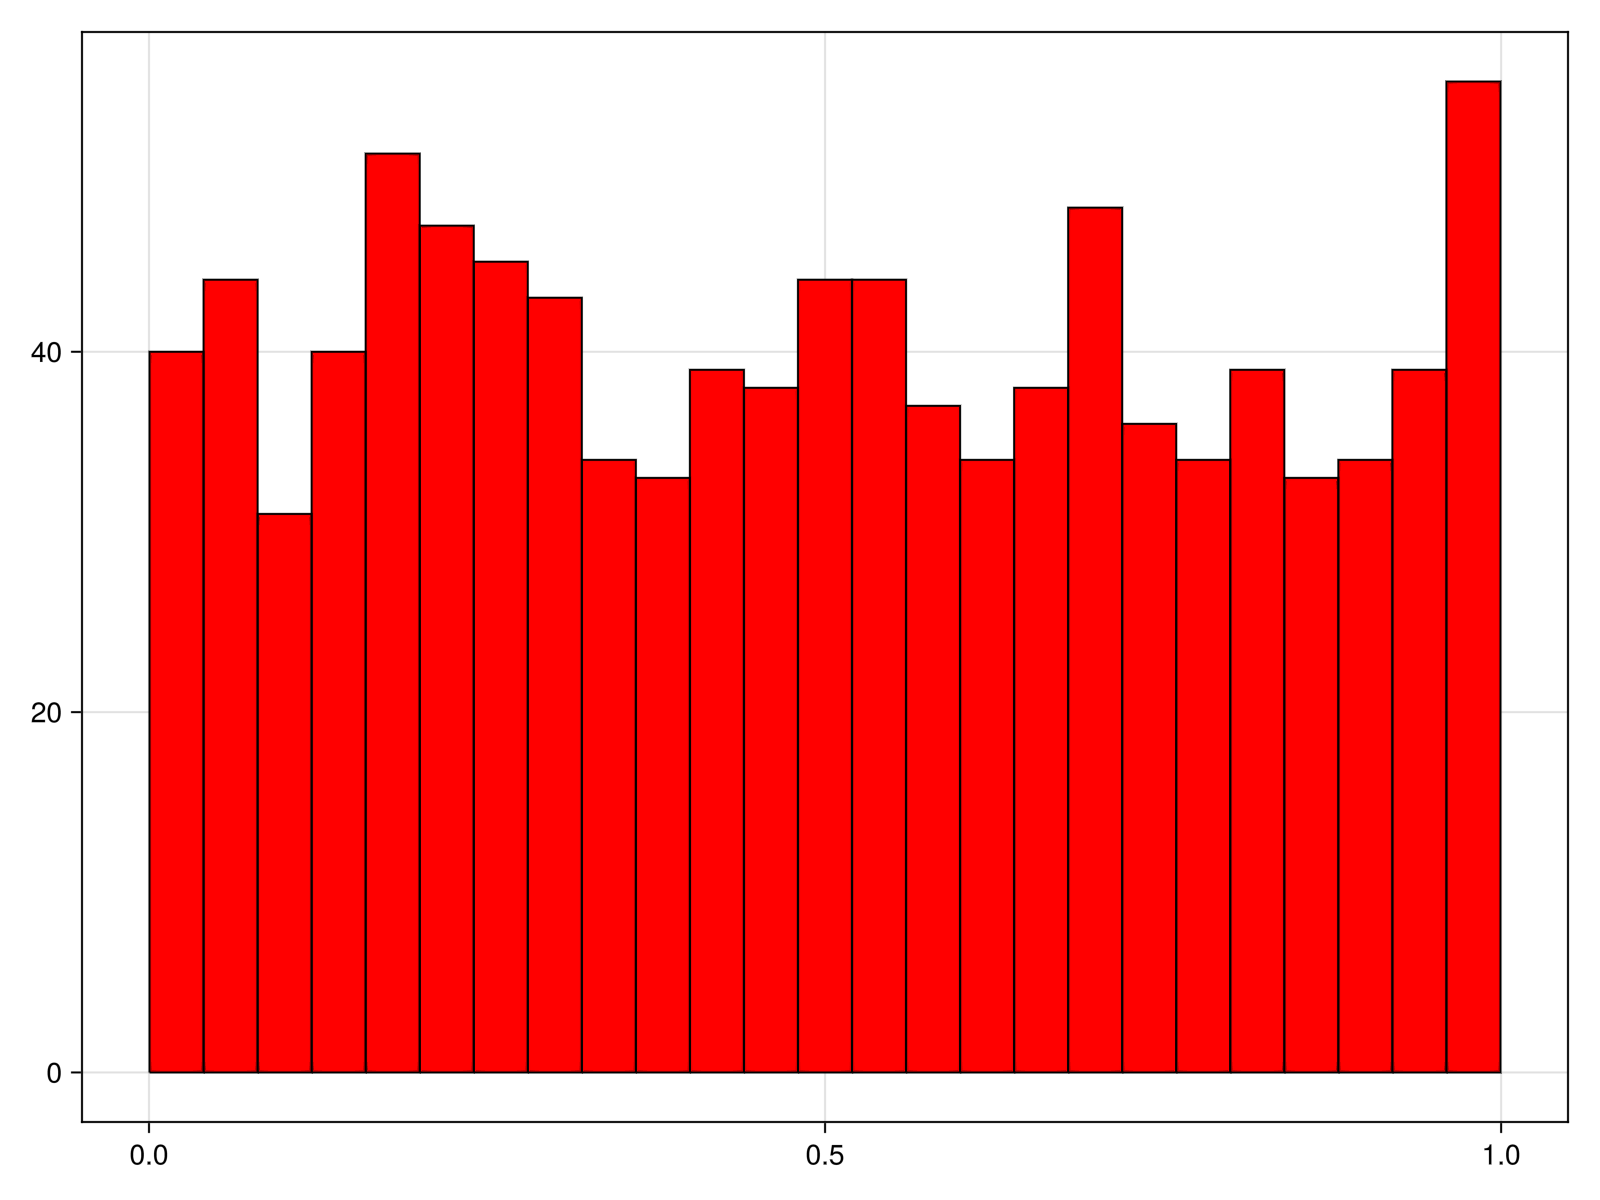

In [19]:
fig = Figure(;size = (800,600))
ax = Axis(fig[1,1])
hist!(rand(1_000),bins = 25, color = :red, strokewidth = 1, strokecolor = :black) 
fig

### Now choose a random number from a list

In [22]:
rand(["A","B","C","D"])

"B"

### Generate 1 million numbers chosen from a gaussian distribution
Plot the histogram to see that it looks like a Gaussian:

$$
P(x) = \frac{1}{\sigma \sqrt{2\pi} }e^{ - \left(x - \mu \right)^2/ 2\sigma ^2} 
$$

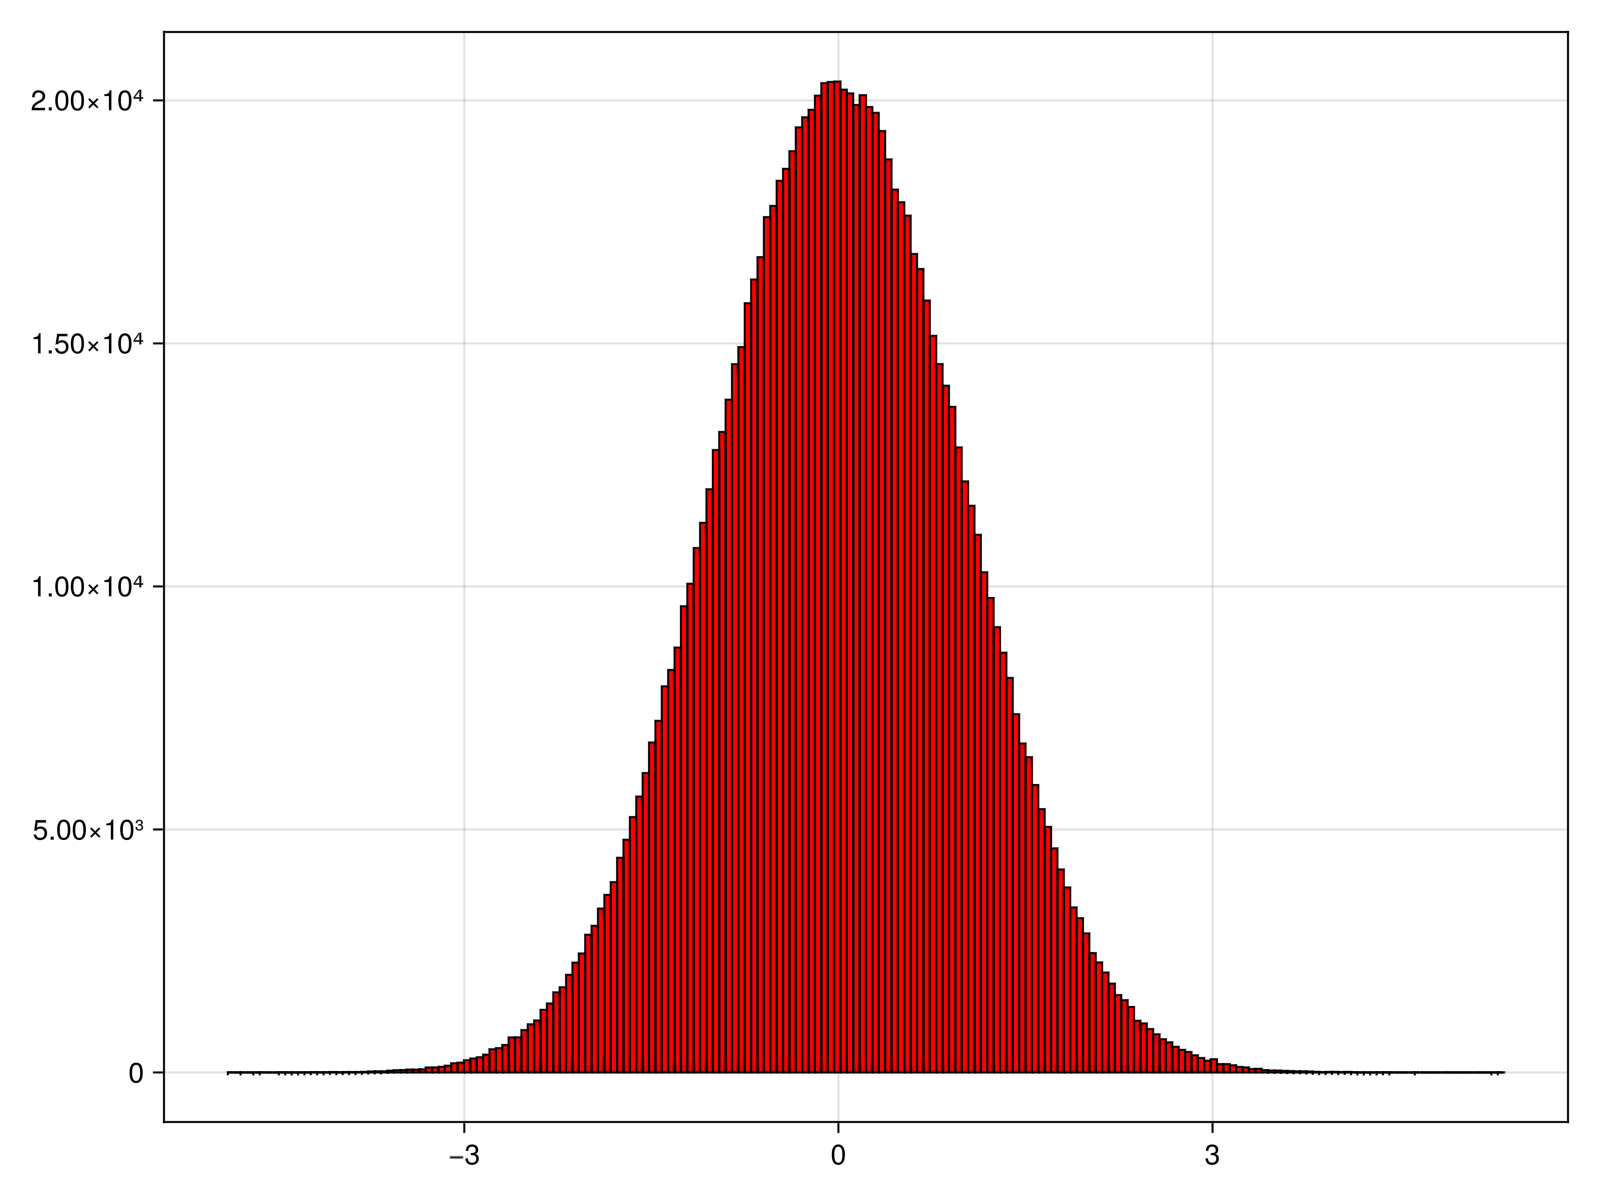

In [29]:
fig = Figure(;size = (800,600))
ax = Axis(fig[1,1])
hist!(randn(1_000_000),bins = 200, color = :red, strokewidth = 1, strokecolor = :black) 
fig

## Computing π via a Monte Carlo method
Imaging throwing darts at a unit square extending from 0 to 1 in the x and y directions:

In [35]:
x = rand(100);

In [36]:
y = rand(100);

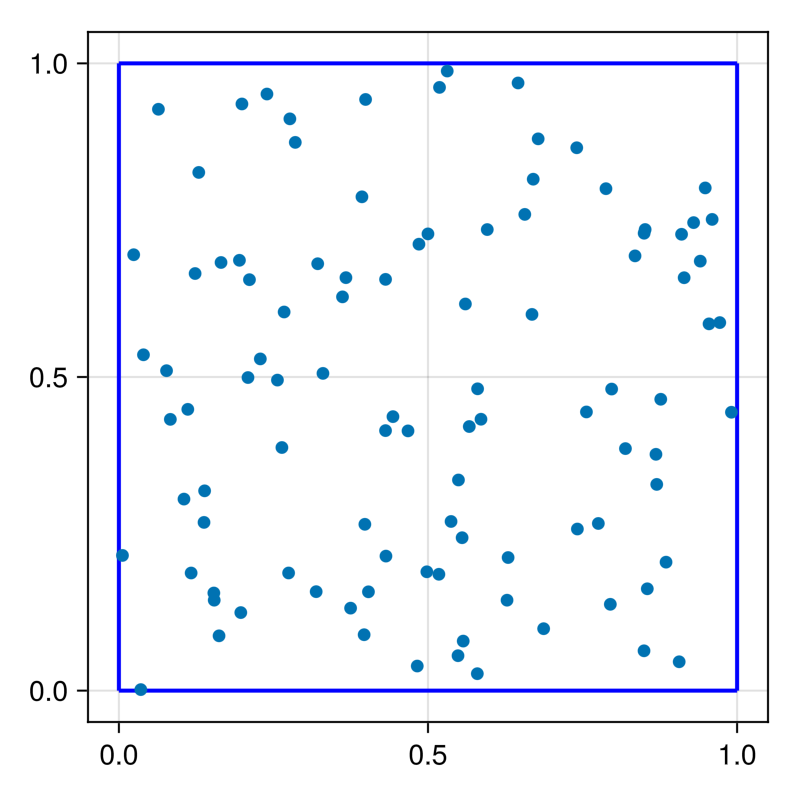

In [39]:
fig = Figure(;size = (400,400))
ax = Axis(fig[1,1])
lines!([0,1],[0,0], linewidth=2, color =:blue)
lines!([0,0], [0,1],  linewidth=2, color =:blue)
lines!([0,1],[1,1],  linewidth=2, color =:blue)
lines!([1,1], [0,1],  linewidth=2, color =:blue)
scatter!(x,y, )
fig

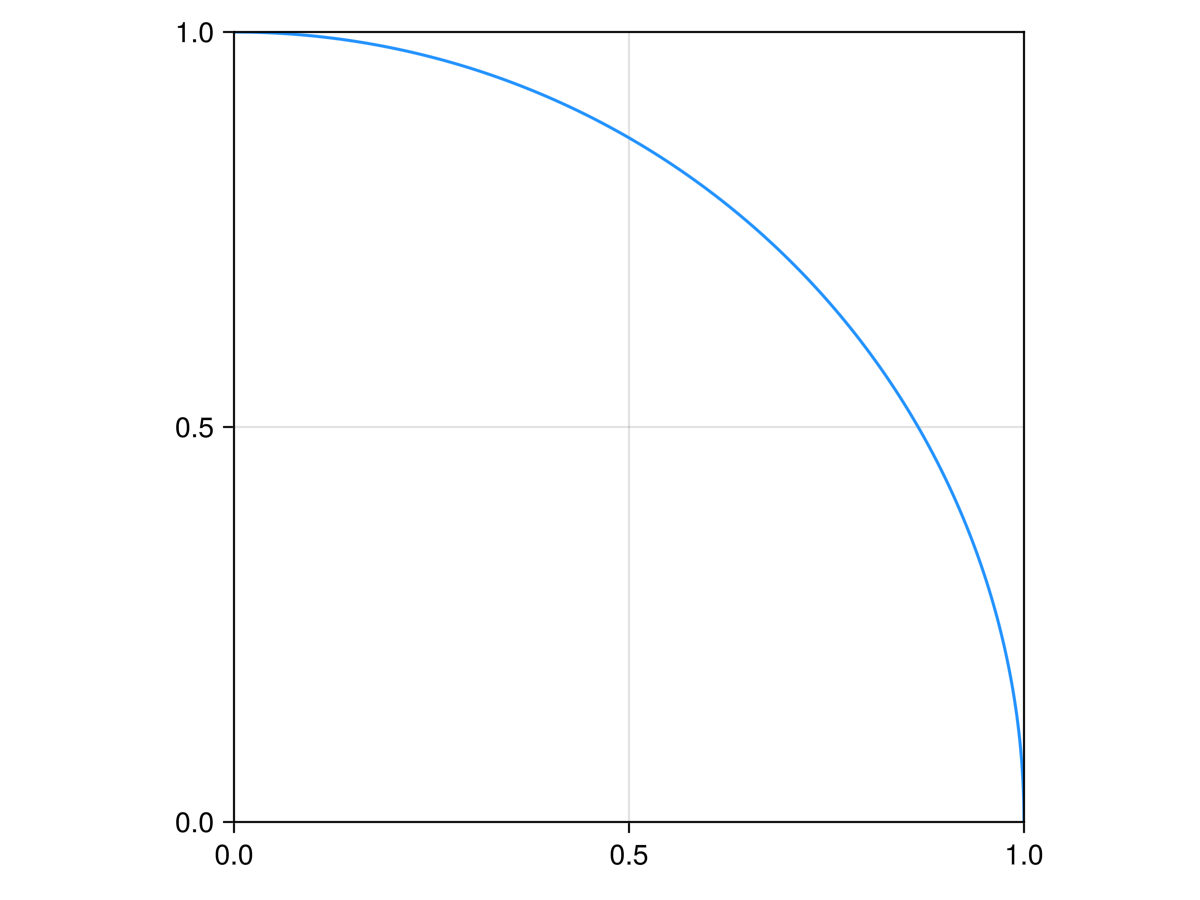

In [65]:
fig = Figure()
ax = Axis(fig[1,1], aspect=1)
xlims!(ax, 0,1)
ylims!(ax,0,1)
#poly!(Point2f[(0, 0), (1, 0), (1, 1), (0, 1)], color = :white, strokecolor = :green, strokewidth = 1)
arc!(Point2f(0), 1, 0.0, π/2; color=:dodgerblue, )
fig

In [103]:
function darts(n)
    x = rand(n)
    y = rand(n)
    hits_x = Array{Float64}(undef,1)
    hits_y = Array{Float64}(undef,1)
    not_x = Array{Float64}(undef,1)
    not_y= Array{Float64}(undef,1)
    hits = 0
    for i in 1:n
        if x[i]^2 + y[i]^2 ≤ 1.0
            push!(hits_x, x[i])
            push!(hits_y, y[i])
            hits = hits + 1
        else
            push!(not_x, x[i])
            push!(not_y, y[i])
        end
    end
    fig = Figure()
    ax = Axis(fig[1,1], aspect=1)
    xlims!(ax, 0,1)
    ylims!(ax,0,1)
    arc!(Point2f(0), 1, 0.0, π/2; color=:dodgerblue )
    scatter!(hits_x,hits_y, alpha=0.5)
    scatter!(not_x,not_y, alpha=0.25)
    fig
    return  4.0*hits/n, fig
end    

darts (generic function with 1 method)

π ≈ 3.1415004


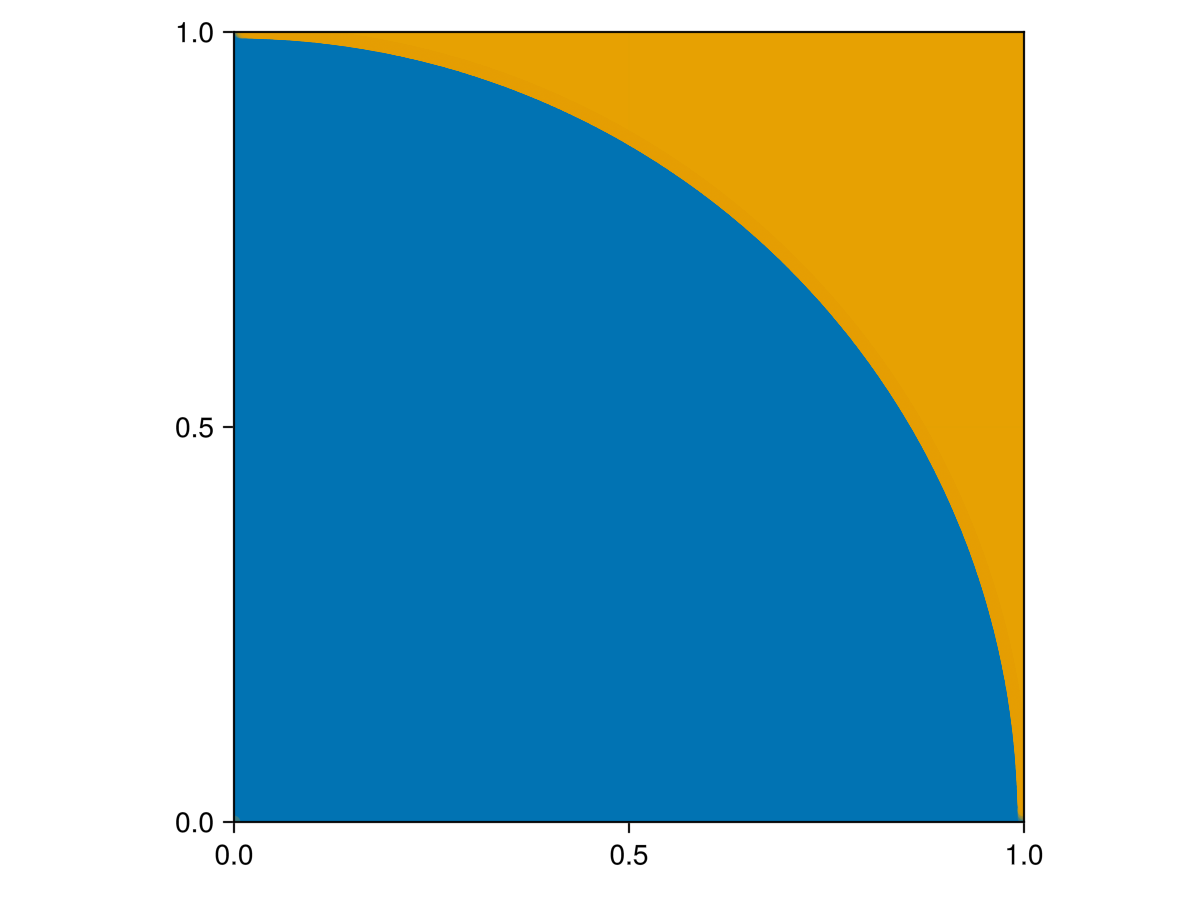

In [109]:
estimate, fig = darts(10_000_000)
println("π ≈ ", estimate)
fig

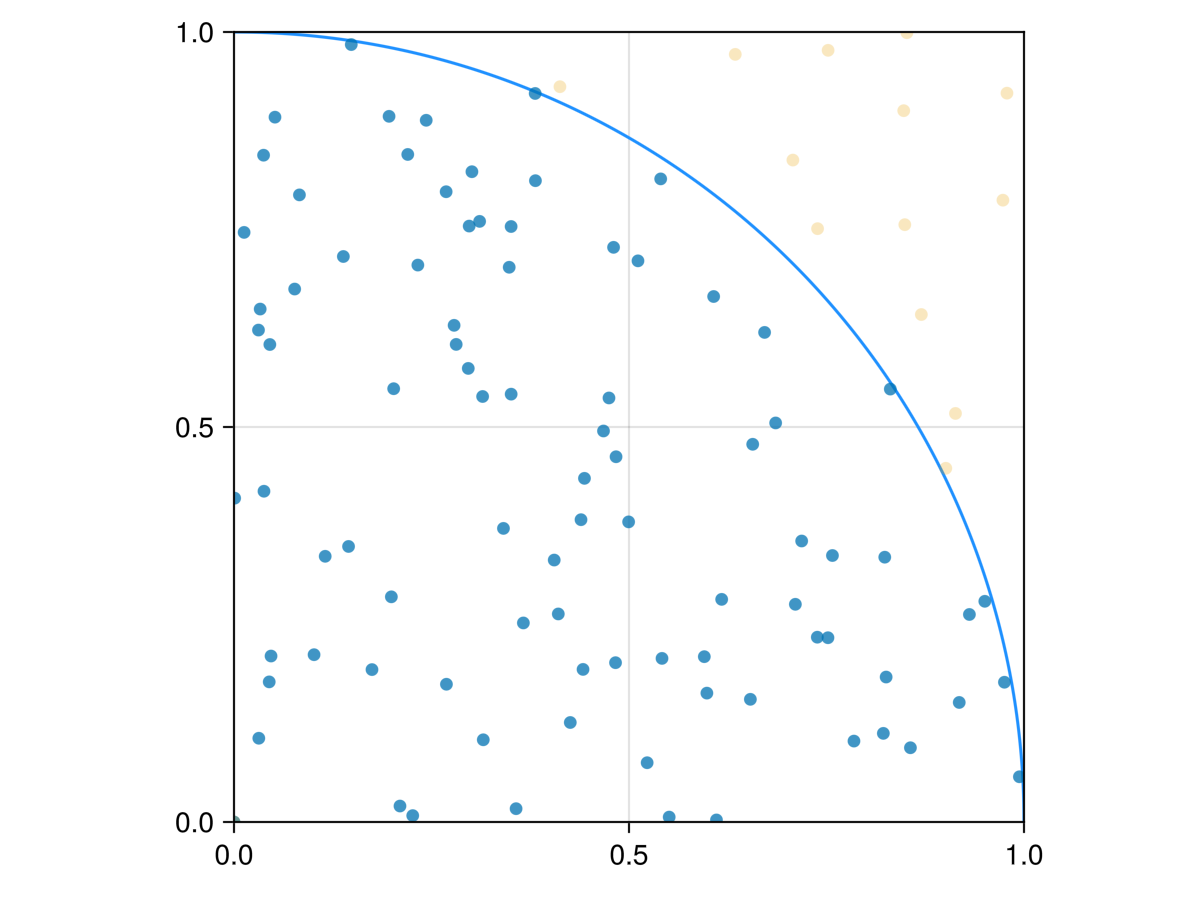

In [95]:
fig = Figure()
ax = Axis(fig[1,1], aspect=1)
xlims!(ax, 0,1)
ylims!(ax,0,1)
#poly!(Point2f[(0, 0), (1, 0), (1, 1), (0, 1)], color = :white, strokecolor = :green, strokewidth = 1)
arc!(Point2f(0), 1, 0.0, π/2; color=:dodgerblue )
scatter!(xh,yh, alpha=0.75)
scatter!(notx,noty, alpha=0.25)
fig

# The Drunkard's walk
You start at $(x,y) = (0,0)$ and you take N steps. Each step can be either $\pm 1$ in $x$ or $y$.
You continue this for N steps. You can read about this in the [Feynman Lectures](https://www.feynmanlectures.caltech.edu/I_41.html).

## Question: How far on average do you get from origin?
Steps:

    1. Write a function that computes an N step walk. Return an N by 2 array (or two N by 1 arrays) 
    2. Plot the one walk 
    3. Conduct a lot of walks and compute average x and y positions as well as the average squared distance from the origin
    4. Make a plot showing $<x>$ and $<y>$ positions vs N
    5. Make a plot showing $<r^2>$ vs N